In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import gc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_feather("../data/finaldata/fact_data.feather")

In [3]:
tmp_data = data._get_numeric_data()
tmp_data = tmp_data.fillna(0)
tmp_data.head()

,product_volume,number_of_blood_product_units_processed,number_of_donation_units_processed,number_of_duplicated_donation_units,number_of_skipped_donation_barcodes,number_of_donation_alarms,number_of_alerts,number_of_duplicated_exception_units,number_of_reprocessed_units,number_of_inconclusive_sealed_units,number_of_unrecognized_barcodes,number_of_skipped_exception_barcodes,number_of_temp_out_of_range_exceptions,number_of_exception_alarms,procedure_duration_minutes,idle_time_duration_minutes,load_duration_minutes,unload_duration_minutes,load_idle_time_duration_minutes,run_duration_minutes,barcode_scan_duration_minutes,number_of_procedures,number_of_dummy_bags,number_of_barcode_scans,number_of_skipped_run_barcodes,start_basin_temperature,end_basin_temperature,max_basin_temperature,min_basin_temperature,run_number
0,94,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
1,64,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
2,9,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
3,180,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
4,68,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0


In [4]:
train_data, test_data = train_test_split(tmp_data, test_size=0.5)
model = LinearRegression().fit(train_data['run_duration_minutes'].values.reshape(-1,1).astype('int'), train_data['number_of_alerts'].astype('int'))

In [5]:
print("Accuracy =", model.score(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'), train_data['number_of_alerts'].astype('int')))
test_data.head()

Accuracy = 0.0023899444081079135


,product_volume,number_of_blood_product_units_processed,number_of_donation_units_processed,number_of_duplicated_donation_units,number_of_skipped_donation_barcodes,number_of_donation_alarms,number_of_alerts,number_of_duplicated_exception_units,number_of_reprocessed_units,number_of_inconclusive_sealed_units,number_of_unrecognized_barcodes,number_of_skipped_exception_barcodes,number_of_temp_out_of_range_exceptions,number_of_exception_alarms,procedure_duration_minutes,idle_time_duration_minutes,load_duration_minutes,unload_duration_minutes,load_idle_time_duration_minutes,run_duration_minutes,barcode_scan_duration_minutes,number_of_procedures,number_of_dummy_bags,number_of_barcode_scans,number_of_skipped_run_barcodes,start_basin_temperature,end_basin_temperature,max_basin_temperature,min_basin_temperature,run_number
4783535,308,1,1,1,0,0,0,0,0,0,0,0,0,0,25.316668,0.150000,2.366667,0.233333,0.383333,22.083334,1.066667,1,0,9,0,21.702000,22.062000,22.559000,21.035,4793.0
7680458,10,1,1,1,0,0,1,0,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,19.489634,1.460133,1,0,9,0,21.306000,21.909000,22.638000,20.789,1964.0
8248433,41,1,1,1,0,0,0,0,0,0,0,0,0,1,30.466667,0.283333,6.316667,1.600000,2.983333,19.000000,4.566667,1,0,9,0,21.806000,21.841999,23.016001,21.014,9148.0
6591248,24,1,1,1,0,0,0,0,0,0,0,0,0,0,38.616665,1.966667,13.133333,0.050000,4.050000,19.150000,3.316667,1,0,9,0,22.146999,21.959000,22.900999,21.028,14460.0
4266657,30,1,1,1,0,0,0,0,0,0,0,0,0,0,19.900000,1.183333,2.666667,0.300000,1.083333,14.600000,1.666667,1,1,8,0,22.049000,22.118999,22.672001,20.855,7143.0


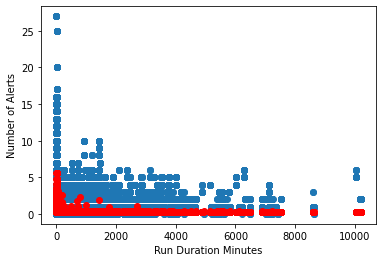

In [6]:
y_pred_sk = model.predict(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'))
                          
plt.clf()
plt.scatter(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'), train_data['number_of_alerts'].astype('int'))
plt.scatter(test_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'), y_pred_sk, c="red")
plt.xlabel("Run Duration Minutes")
plt.ylabel("Number of Alerts")
plt.show()

In [7]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [10]:
model.score(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'), train_data['number_of_alerts'].astype('int'))

0.0023899444081079135